In [ ]:
'''
Name: Lena Corredor
Resource: @SFBARTalert
Description: From BART Twitter account, find out how many delays Bart has each week.
version 4: Bar Chart'''

In [10]:
# Dependencies
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Set dataframe to show entire width
pd.set_option('display.max_colwidth', -1)

In [11]:
path="../03_Data/lena_delay_raw.csv"

df=pd.read_csv(path)
df.head()

,Date,Message
0,"Mar 11, 2018",BART recovering: 10 min delay on SF line in SFO and MLBR dirs due to obstruction.
1,"Mar 10, 2018","BART recovering: 10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity."
2,"Mar 10, 2018","10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity."
3,"Mar 09, 2018",Oak airport connector is back in svc.
4,"Mar 09, 2018",Oak airport connector is out of svc due to mechanical probs. For Oak airport take ac transit bus #73 from COLS stn.


In [12]:
#Clean1: Drop rows that contains BART recovering bc we want unique rows 
#          that identifies the delays
print(df[df.Message.str.contains('BART recovering')].shape)
df3=df.loc[~df["Message"].str.contains('BART recovering'),:]

# print(df.shape)
# print(df2.shape)
# print(df3.shape)
bool(df3.is_copy)

(1374, 2)


True

In [13]:
df3.head()

,Date,Message
2,"Mar 10, 2018","10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity."
3,"Mar 09, 2018",Oak airport connector is back in svc.
4,"Mar 09, 2018",Oak airport connector is out of svc due to mechanical probs. For Oak airport take ac transit bus #73 from COLS stn.
6,"Mar 09, 2018","10 min delay on WARM line in DUBL, WARM, RICH and DALY dirs due to a medical emergency."
8,"Mar 09, 2018",10 min delay on PITT line in PITT dir due to police activity.


In [14]:
#Clean2: filter rows with 'delay
df4=df3[df3.Message.str.contains('delay',case=False)]
print(df4.shape)
df4.head()

(1555, 2)


,Date,Message
2,"Mar 10, 2018","10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity."
6,"Mar 09, 2018","10 min delay on WARM line in DUBL, WARM, RICH and DALY dirs due to a medical emergency."
8,"Mar 09, 2018",10 min delay on PITT line in PITT dir due to police activity.
12,"Mar 08, 2018","Major delay at MACR in PITT, FRMT, RICH and SF dirs due to a major medical emergency."
17,"Mar 07, 2018","Major delay on WARM line in DUBL, WARM, RICH and DALY dirs due to equip prob."


In [15]:
#Clean3: drop duplicates
#this df shows tweets with delays
df5=df4.drop_duplicates()
df5.shape
df5.head()

,Date,Message
2,"Mar 10, 2018","10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity."
6,"Mar 09, 2018","10 min delay on WARM line in DUBL, WARM, RICH and DALY dirs due to a medical emergency."
8,"Mar 09, 2018",10 min delay on PITT line in PITT dir due to police activity.
12,"Mar 08, 2018","Major delay at MACR in PITT, FRMT, RICH and SF dirs due to a major medical emergency."
17,"Mar 07, 2018","Major delay on WARM line in DUBL, WARM, RICH and DALY dirs due to equip prob."


In [16]:
#Add a column to represent the week number
# bool(df5.is_copy)
df5['Date']=pd.to_datetime(df5['Date'], infer_datetime_format=True)
df5['Month'] = df5['Date'].dt.month
df5.head()

/Users/lena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Message,Month
2,2018-03-10,"10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity.",3
6,2018-03-09,"10 min delay on WARM line in DUBL, WARM, RICH and DALY dirs due to a medical emergency.",3
8,2018-03-09,10 min delay on PITT line in PITT dir due to police activity.,3
12,2018-03-08,"Major delay at MACR in PITT, FRMT, RICH and SF dirs due to a major medical emergency.",3
17,2018-03-07,"Major delay on WARM line in DUBL, WARM, RICH and DALY dirs due to equip prob.",3


In [17]:
#create a df for tweets contains major delay
df_major=df5[df5.Message.str.contains('major delay',case=False)]
df_major.shape
df_major.head()

,Date,Message,Month
12,2018-03-08,"Major delay at MACR in PITT, FRMT, RICH and SF dirs due to a major medical emergency.",3
17,2018-03-07,"Major delay on WARM line in DUBL, WARM, RICH and DALY dirs due to equip prob.",3
39,2018-02-27,"Major delay between 24TH and GLEN on SF line in SFO, MLBR, DALY and East Bay dirs due to equip prob.",2
52,2018-02-26,Major delay at NCON in PITT and SFO dirs due to a major medical emergency.,2
84,2018-02-17,"Major delay in berkeley hills tunnel in PITT, SFO and MLBR dirs due to track maint.",2


In [18]:
df5.Date.dtype

dtype('<M8[ns]')

In [19]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [20]:
#Split the dataset to 3 years: 2018,2017,2016

mask_2018 = (df5['Date'] >= '2018-1-1') & (df5['Date'] < '2018-12-31')
mask_2017 = (df5['Date'] >= '2017-1-1') & (df5['Date'] < '2017-12-31')
mask_2016 = (df5['Date'] >= '2016-1-1') & (df5['Date'] < '2016-12-31')
df_2018=df5.loc[mask_2018]
df_2017=df5.loc[mask_2017]
df_2016=df5.loc[mask_2016]
print(df_2018.Date.max())
print(df_2018.Date.min())
print(df_2017.Date.max())
print(df_2017.Date.min())
print(df_2016.Date.max())
print(df_2016.Date.min())
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
display(df_2016.head())
display(df_2017.head())
display(df_2018.head())


2018-03-10 00:00:00
2018-01-03 00:00:00
2017-12-30 00:00:00
2017-01-02 00:00:00
2016-12-30 00:00:00
2016-02-10 00:00:00
(566, 3)
(860, 3)
(125, 3)


,Date,Message,Month
2049,2016-12-30,"Major delay in transbay tube in SFO, MLBR, DALY and East Bay dirs due to person(s) on track.",12
2050,2016-12-30,Major delay in transbay tube in East Bay dir due to person(s) on track.,12
2051,2016-12-30,20 min delay in transbay tube in East Bay dir due to person(s) on track.,12
2052,2016-12-30,10 min delay in transbay tube in East Bay dir due to person(s) on track.,12
2058,2016-12-28,10 min delay at DALY in SFO and MLBR dirs.,12


,Date,Message,Month
252,2017-12-30,10 min delay at HAYW in RICH and DALY dirs due to police activity.,12
258,2017-12-26,"10 min delay at 12TH in PITT, DUBL, WARM, FRMT, RICH, SFO, MLBR and DALY dirs due to police activity.",12
260,2017-12-26,10 min delay at DELN in RICH dir due to a medical emergency.,12
264,2017-12-26,"20 min delay at BALB in SFO, MLBR and DALY dirs due to a medical emergency.",12
265,2017-12-26,"10 min delay at BALB in SFO, MLBR and DALY dirs due to a medical emergency.",12


,Date,Message,Month
2,2018-03-10,"10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity.",3
6,2018-03-09,"10 min delay on WARM line in DUBL, WARM, RICH and DALY dirs due to a medical emergency.",3
8,2018-03-09,10 min delay on PITT line in PITT dir due to police activity.,3
12,2018-03-08,"Major delay at MACR in PITT, FRMT, RICH and SF dirs due to a major medical emergency.",3
17,2018-03-07,"Major delay on WARM line in DUBL, WARM, RICH and DALY dirs due to equip prob.",3


In [22]:
#Group the dataframes by week.
df_2018=df_2018.groupby("Month").count()
df_2017=df_2017.groupby("Month").count()
df_2016=df_2016.groupby("Month").count()
display(df_2018.head())
display(df_2017.head())
display(df_2016.head())

,Date,Message
Month,,
1,65,65
2,49,49
3,11,11


,Date,Message
Month,,
1,111,111
2,77,77
3,56,56
4,91,91
5,96,96


,Date,Message
Month,,
2,35,35
3,74,74
4,42,42
5,31,31
6,53,53


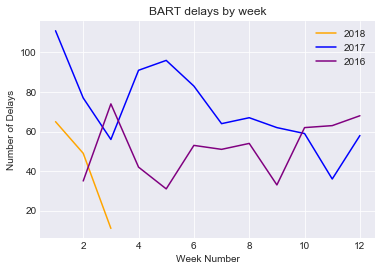

In [23]:
sns.set_style("darkgrid")
result = plt.plot(df_2018.index.values, df_2018["Date"],color="orange", label="2018" )
p2018=result[0]
result = plt.plot(df_2017.index.values, df_2017["Date"],color="blue", label="2017" )
p2017=result[0]
result = plt.plot(df_2016.index.values, df_2016["Date"],color="purple", label="2016" )
p2016=result[0]
plt.legend(handles=[p2018, p2017,p2016], loc="best")
plt.title("BART delays by week")
plt.xlabel("Week Number")
plt.ylabel("Number of Delays")
plt.show()

# idf.index.get_level_values('A')

In [137]:
times_clean1[33]

'Sat Mar 03 06:20:25 +0000 2018'

In [107]:
#cleaning round2: discard duplicate tweets if they are at tweeted after each other.
tweets=[]
times=[]
zipped=list(zip(times_clean1,tweets_clean1))
i=0 #left compare pointer
j=1 #right compare pointer


#add in the first item because it does not require comparison
tweets.append(tweets_clean1[0])
times.append(times_clean1[0])

for time,tweet in zipped:
    if tweets_clean1[i]==tweet:
        pass
    else:
#         print("---")
#         print(">"+tweets_clean1[i])
#         print(">"+tweet)
        tweets.append(tweet)
        times.append(time)
        i=j
    j+=1

d={"Tweets":tweets,"Time":time}
df=pd.DataFrame(d)
df.head(30)

,Time,Tweets
0,Sat Mar 03 07:54:08 +0000 2018,@SFBARTalert 15min+ delay Richmond-bound line holding at MacArthur no updates what gives
1,Sat Mar 03 07:54:08 +0000 2018,"RT @SFBARTalert: 10 min delay at DELN on RICH line in WARM, RICH and MLBR dirs due to police activity."
2,Sat Mar 03 07:54:08 +0000 2018,"RT @SFBARTalert: 10 min delay on WARM line in DUBL, WARM, RICH and DALY dirs due to a medical emergency."
3,Sat Mar 03 07:54:08 +0000 2018,RT @SFBARTalert: 10 min delay on PITT line in PITT dir due to police activity.
4,Sat Mar 03 07:54:08 +0000 2018,"RT @SFBARTalert: Major delay at MACR in PITT, FRMT, RICH and SF dirs due to a major medical emergency."
5,Sat Mar 03 07:54:08 +0000 2018,"RT @SFBARTalert: Major delay on WARM line in DUBL, WARM, RICH and DALY dirs due to equip prob."
6,Sat Mar 03 07:54:08 +0000 2018,RT @SFBARTalert: 10 min delay on WARM line in RICH and DALY dirs due to equip prob.
7,Sat Mar 03 07:54:08 +0000 2018,@SFBARTalert 5 min delay for Pittsburgh to SF line
